# _ANALYSIS HEART DISEASE DATA SET_

<hr style="height:2px;">

[Official Link to the Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

<br>

## Sumary
- [Preparing the ambient](#Preparing-the-ambient)
- [Getting the Data Set](#Getting-the-Data-Set)
    - [Missing values](#Missing-values)
    - [Describing Data Set](#Describing-Data-Set)
- [Categorical Data](#Categorical-Data)
    - [Target](#Target)
- [Numerical Data](#Numerical-Data)
    - [Distributions](#Distributions)
- [Correlation Matrix](#Correlation-Matrix)
    - [One-Hot Encoding](#One-Hot-Encoding)
- [Saving Data](#Saving-Data)

<hr>

## _Preparing the ambient_

First, we need prepare the packages that we will use.
The packages are "DataFrames", "CSV", "Plots", "StatsPlots", "Statistics".

In [103]:
using DataFrames, CSV, Plots, StatsPlots, Statistics, Plots.PlotMeasures

If some of the packages is not instaled in your computer just use:
```julia
    using Pkg;
    Pkg.add("PackageName");
```   
<br>

[Back to the top](#Sumary)

<hr>

## _Getting the Data Set_
We need to first import the data set into our program.

In [104]:
# Including file of functions
include("Functions/ImportDataSet.jl"); 

# Getting the data set
df = GetDataSet("Data/processed.cleveland.data"); # Function defined in ImportDataSet.jl

# Showing the 10 firsts rows of data set
show(first(df, 10), allcols = true); # Functions defined in DataFrames Pkg

10×14 DataFrame
│ Row │ age     │ sex   │ cp    │ trestbps │ chol    │ fbs     │ restecg │
│     │ Float64 │ Int64 │ Int64 │ Float64  │ Float64 │ Float64 │ Int64   │
├─────┼─────────┼───────┼───────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ 67.0    │ 1     │ 4     │ 160.0    │ 286.0   │ 0.0     │ 2       │
│ 2   │ 67.0    │ 1     │ 4     │ 120.0    │ 229.0   │ 0.0     │ 2       │
│ 3   │ 37.0    │ 1     │ 3     │ 130.0    │ 250.0   │ 0.0     │ 0       │
│ 4   │ 41.0    │ 0     │ 2     │ 130.0    │ 204.0   │ 0.0     │ 2       │
│ 5   │ 56.0    │ 1     │ 2     │ 120.0    │ 236.0   │ 0.0     │ 0       │
│ 6   │ 62.0    │ 0     │ 4     │ 140.0    │ 268.0   │ 0.0     │ 2       │
│ 7   │ 57.0    │ 0     │ 4     │ 120.0    │ 354.0   │ 0.0     │ 0       │
│ 8   │ 63.0    │ 1     │ 4     │ 130.0    │ 254.0   │ 0.0     │ 2       │
│ 9   │ 53.0    │ 1     │ 4     │ 140.0    │ 203.0   │ 1.0     │ 2       │
│ 10  │ 57.0    │ 1     │ 4     │ 140.0    │ 192.0   │ 0.0     │ 0       │

│ Row │ 

### Missing values
While looking at the data set we observed some missing values, this occur when no data was stored for that variable in that observation.

In [105]:
# Filtering only the missing values
missing = filter(row -> row.ca == "?" || row.thal == "?", df); # Function defined in DataFrames Pkg

# Showing the rows from the missing values
show(missing, allcols = true);

6×14 DataFrame
│ Row │ age     │ sex   │ cp    │ trestbps │ chol    │ fbs     │ restecg │
│     │ Float64 │ Int64 │ Int64 │ Float64  │ Float64 │ Float64 │ Int64   │
├─────┼─────────┼───────┼───────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ 53.0    │ 0     │ 3     │ 128.0    │ 216.0   │ 0.0     │ 2       │
│ 2   │ 52.0    │ 1     │ 3     │ 138.0    │ 223.0   │ 0.0     │ 0       │
│ 3   │ 43.0    │ 1     │ 4     │ 132.0    │ 247.0   │ 1.0     │ 2       │
│ 4   │ 52.0    │ 1     │ 4     │ 128.0    │ 204.0   │ 1.0     │ 0       │
│ 5   │ 58.0    │ 1     │ 2     │ 125.0    │ 220.0   │ 0.0     │ 0       │
│ 6   │ 38.0    │ 1     │ 3     │ 138.0    │ 175.0   │ 0.0     │ 0       │

│ Row │ thalach │ exang │ oldpeak │ slope │ ca     │ thal   │ target │
│     │ Float64 │ Int64 │ Float64 │ Int64 │ String │ String │ Int64  │
├─────┼─────────┼───────┼─────────┼───────┼────────┼────────┼────────┤
│ 1   │ 115.0   │ 0     │ 0.0     │ 1     │ 0.0    │ ?      │ 0      │
│ 2   │ 169.0   │ 0     │

- How did we deal with it?

There were only 6 missing values and because it is a really small part of the total(1.9%), we just remove it.

In [106]:
# Including file of functions
include("Functions/MissingValues.jl");

println("Number of rows with missing: $(size(df)[1])");

# Removing missing values com dataframe
df = RemoveMissing(df); # Function defined in MissingValues.jl

println("Number of rows without missing: $(size(df)[1])");

Number of rows with missing: 302
Number of rows without missing: 296


### Describing Data Set

Next, we are going to describe the data set, that is, get the mean, max and min value, median and other stuff from each property.

In [107]:
describe(df) # Function defined in DataFrames Pkg

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,age,54.5135,29.0,56.0,77.0,,,Float64
2,sex,0.675676,0,1.0,1,,,Int64
3,cp,3.16554,1,3.0,4,,,Int64
4,trestbps,131.649,94.0,130.0,200.0,,,Float64
5,chol,247.399,126.0,243.0,564.0,,,Float64
6,fbs,0.141892,0.0,0.0,1.0,,,Float64
7,restecg,0.993243,0,1.0,2,,,Int64
8,thalach,149.598,71.0,153.0,202.0,,,Float64
9,exang,0.327703,0,0.0,1,,,Int64


<br>

[Back to the top](#Sumary)

<hr>

## Categorical Data
Now we are going to plot the graphs of all categorical attributer from the data set, so that we can take some information of it.

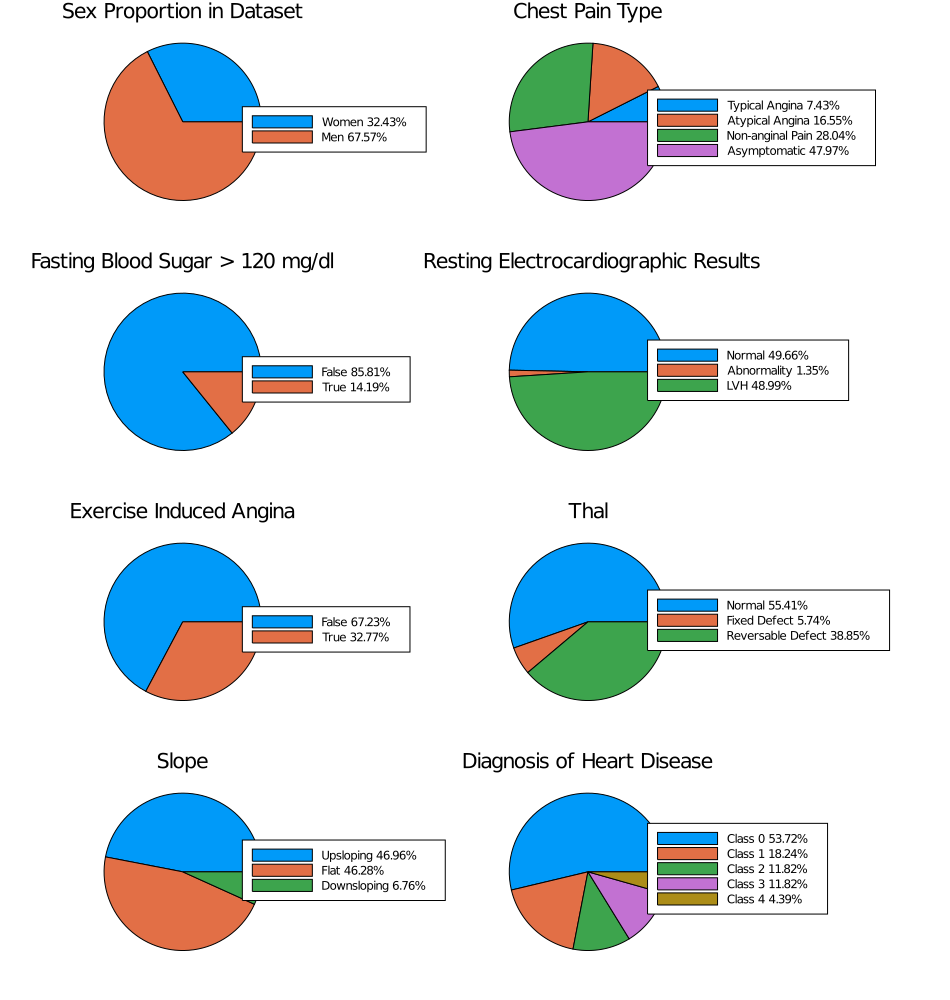

In [108]:
# Including file of functions
include("Functions/CategoricalData.jl");
# Building individualy each plot
# Sec
sex = show_categorical(df.sex, [0, 1], ["Women", "Men"], "Sex Proportion in Dataset", legend = (1,0.5)); # Function defined 
                                                                                                         # in CategoricalData.jl
# CP
cp = show_categorical(df.cp, [1, 2, 3, 4], ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"], 
    "Chest Pain Type"; legend=(1, 0.6));

# FBS
fbs =show_categorical(df.fbs, [0, 1], ["False", "True"], "Fasting Blood Sugar > 120 mg/dl", legend=(1, 0.5));

# Restecg
restecg =show_categorical(df.restecg, [0, 1, 2], ["Normal", "Abnormality", "LVH"], " Resting Electrocardiographic Results"; 
    legend=(1,0.6));

# Exang
exang = show_categorical(df.exang, [0, 1], ["False", "True"], "Exercise Induced Angina", legend = (1,0.5));

# Thal
thal = show_categorical(df.thal, [3, 6, 7], ["Normal", "Fixed Defect", "Reversable Defect"], "Thal", legend = (1,0.6));

# Slope
slope = show_categorical(df.slope, [1, 2, 3], ["Upsloping", "Flat", "Downsloping"], "Slope"; legend=(1, 0.6));

# Target
target = show_categorical(df.target, [0, 1, 2, 3, 4], ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], 
    "Diagnosis of Heart Disease", legend=(1, 0.7));

# Setting the layout of all plots together
l = @layout [
            a{0.4w, 0.25h}  b{0.4w, 0.25h};
            c{0.4w, 0.25h}  d{0.4w, 0.25h};
            e{0.4w, 0.25h}  f{0.4w, 0.25h};
            g{0.4w, 0.25h}  h{0.4w, 0.25h}]

# Ploting all attributes
plot(sex, cp, fbs, restecg, exang, thal, slope, target, layout=l, size=(950, 1000)) # Function defined in Plots Pkg

### Target

For purpose of getting a better balance and reduce the problem increasing our perfomance, we transformed the target in only two classes, 0 if the person do not have heart disease and 1 otherwise.

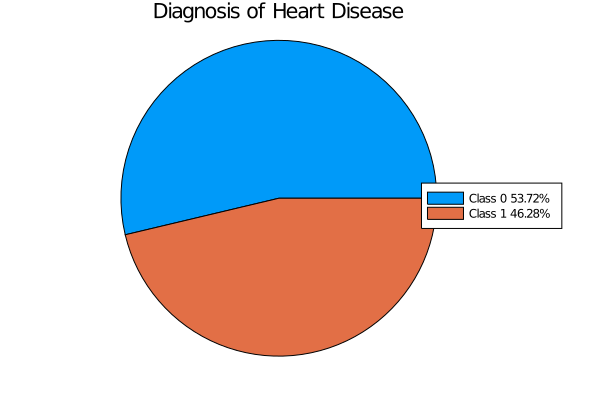

In [109]:
# Making target binary
df.target = map(a -> a == 0 ? 0 : 1, df.target)

# Plotting the new target
show_categorical(df.target, [0, 1], ["Class 0", "Class 1"], "Diagnosis of Heart Disease", legend=(0.9, 0.5))

<br>

[Back to the top](#Sumary)

<hr>

## Numerical Data
Creating the function to plot numerical data.

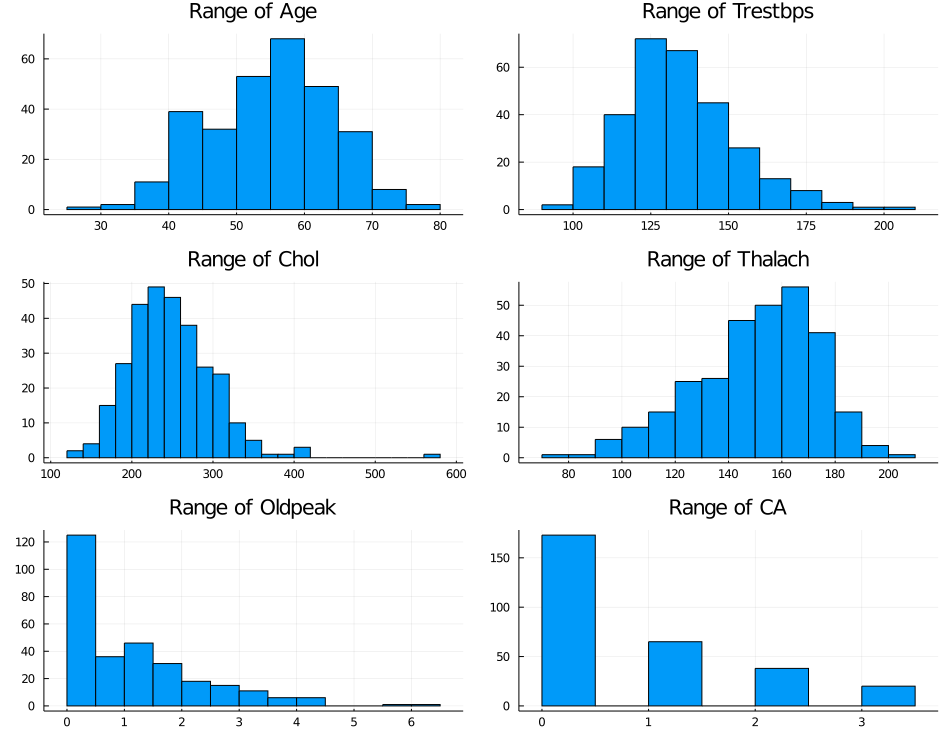

In [110]:
# Building individualy each plot
# Age
age = histogram(df.age, title="Range of Age", labels="Age") # Function defined in Plots Pkg

# Trestbps
trestbps = histogram(df.trestbps, title="Range of Trestbps", labels="trestbps")

# Chol
chol = histogram(df.chol, title="Range of Chol", labels="chol")

# Thalach
thalach = histogram(df.thalach, title="Range of Thalach", labels="thalach")

# Oldpeak
oldpeak = histogram(df.oldpeak, title="Range of Oldpeak", labels="oldpeak")

# CA
ca = histogram(df.ca, title="Range of CA", labels="ca")

# Setting the layout of all plots together
l = @layout [
            a{0.5w, 0.33h}  b{0.5w, 0.33h};
            c{0.5w, 0.33h}  d{0.5w, 0.33h};
            e{0.5w, 0.33h}  f{0.5w, 0.33h}]

# Ploting all attributes
plot(age, trestbps, chol, thalach, oldpeak, ca, layout= l, size=(950,750), legend=false)

### Distributions
From that we can see that the majority of the attributes have a normal distribution(Age, Trestbps, Chol, Thalach) and some have a exponencial distribution(Oldpeak, CA).

<br>

[Back to the top](#Sumary)

<hr>

## Correlation Matrix

Now we are going to plot the correlation matrix of our data set, this rate the relation between two quantitative attributes into grades between -1 and 1. It evaluate with negative numbers when the attibutes are inversely proportional and with a positive number when they are directly proportional.

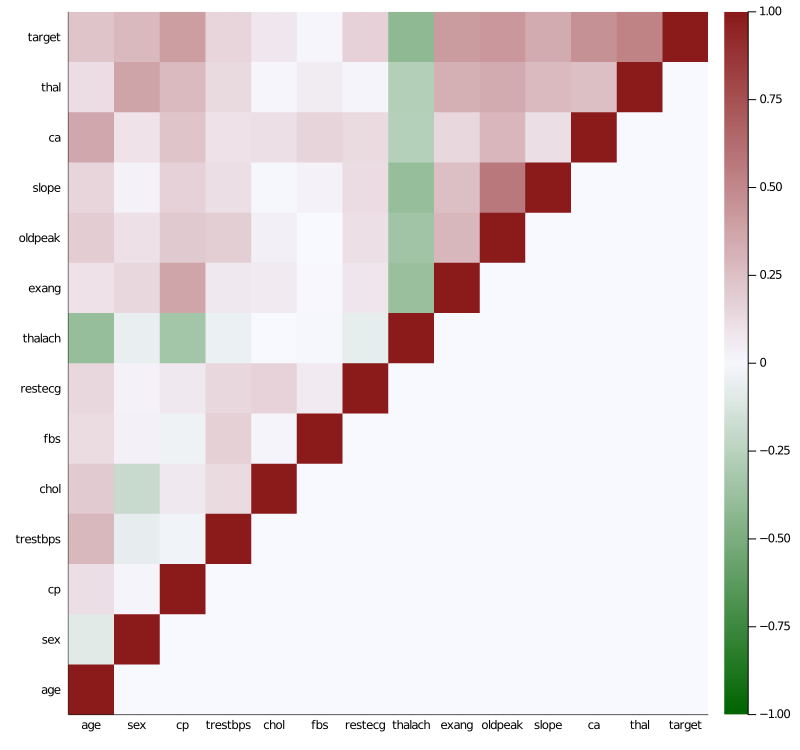

In [111]:
# Including file of functions
include("Functions/Correlation.jl");

# Getting the correlation matrix
CorrMatrix = GetCorrelationMatrix(df); # Funtion defined in Correlation.jl

# Setting the names of each row and column
summary = ["age","sex","cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"];

# Setting the colors we want
color =  cgrad([:darkgreen, :ghostwhite, :firebrick4], 100);

# Plotting the heatmap for our correlation matrix
heatmap(summary, summary, CorrMatrix, size =[800, 750], c = color, clims=(-1, 1)) # Function defined in Plots Pkg

From that we can analyse some attributes with big correlation with the target, and maybe that ones are great predictors.

### One-Hot Encoding
If we think straight, categorical values does not really make sense in correlation, because when it goes up or down, it no necesseraly upgrading or downgrading, it just changing classes. So we use this tecnic called One-Hot Encoding that transform our categorical variables in binary.

- Note: The same problem with categorical values will occur when we are going to prediction, so this one-hot is also a good thing later.

In [112]:
# Including file of functions
include("Functions/OneHot.jl");

# Aplying One-Hot
OneHot_df = OneHotEncoding(df); # Funtion defined in OneHot.jl

# Showing the 10 firsts rows of one-hot data set
show(first(OneHot_df, 10), allcols = true)

10×23 DataFrame
│ Row │ age     │ sex   │ trestbps │ chol    │ fbs     │ thalach │ exang │
│     │ Float64 │ Int64 │ Float64  │ Float64 │ Float64 │ Float64 │ Int64 │
├─────┼─────────┼───────┼──────────┼─────────┼─────────┼─────────┼───────┤
│ 1   │ 67.0    │ 1     │ 160.0    │ 286.0   │ 0.0     │ 108.0   │ 1     │
│ 2   │ 67.0    │ 1     │ 120.0    │ 229.0   │ 0.0     │ 129.0   │ 1     │
│ 3   │ 37.0    │ 1     │ 130.0    │ 250.0   │ 0.0     │ 187.0   │ 0     │
│ 4   │ 41.0    │ 0     │ 130.0    │ 204.0   │ 0.0     │ 172.0   │ 0     │
│ 5   │ 56.0    │ 1     │ 120.0    │ 236.0   │ 0.0     │ 178.0   │ 0     │
│ 6   │ 62.0    │ 0     │ 140.0    │ 268.0   │ 0.0     │ 160.0   │ 0     │
│ 7   │ 57.0    │ 0     │ 120.0    │ 354.0   │ 0.0     │ 163.0   │ 1     │
│ 8   │ 63.0    │ 1     │ 130.0    │ 254.0   │ 0.0     │ 147.0   │ 0     │
│ 9   │ 53.0    │ 1     │ 140.0    │ 203.0   │ 1.0     │ 155.0   │ 1     │
│ 10  │ 57.0    │ 1     │ 140.0    │ 192.0   │ 0.0     │ 148.0   │ 0     │

│ Row │ 

Now we do the correlation matrix again.

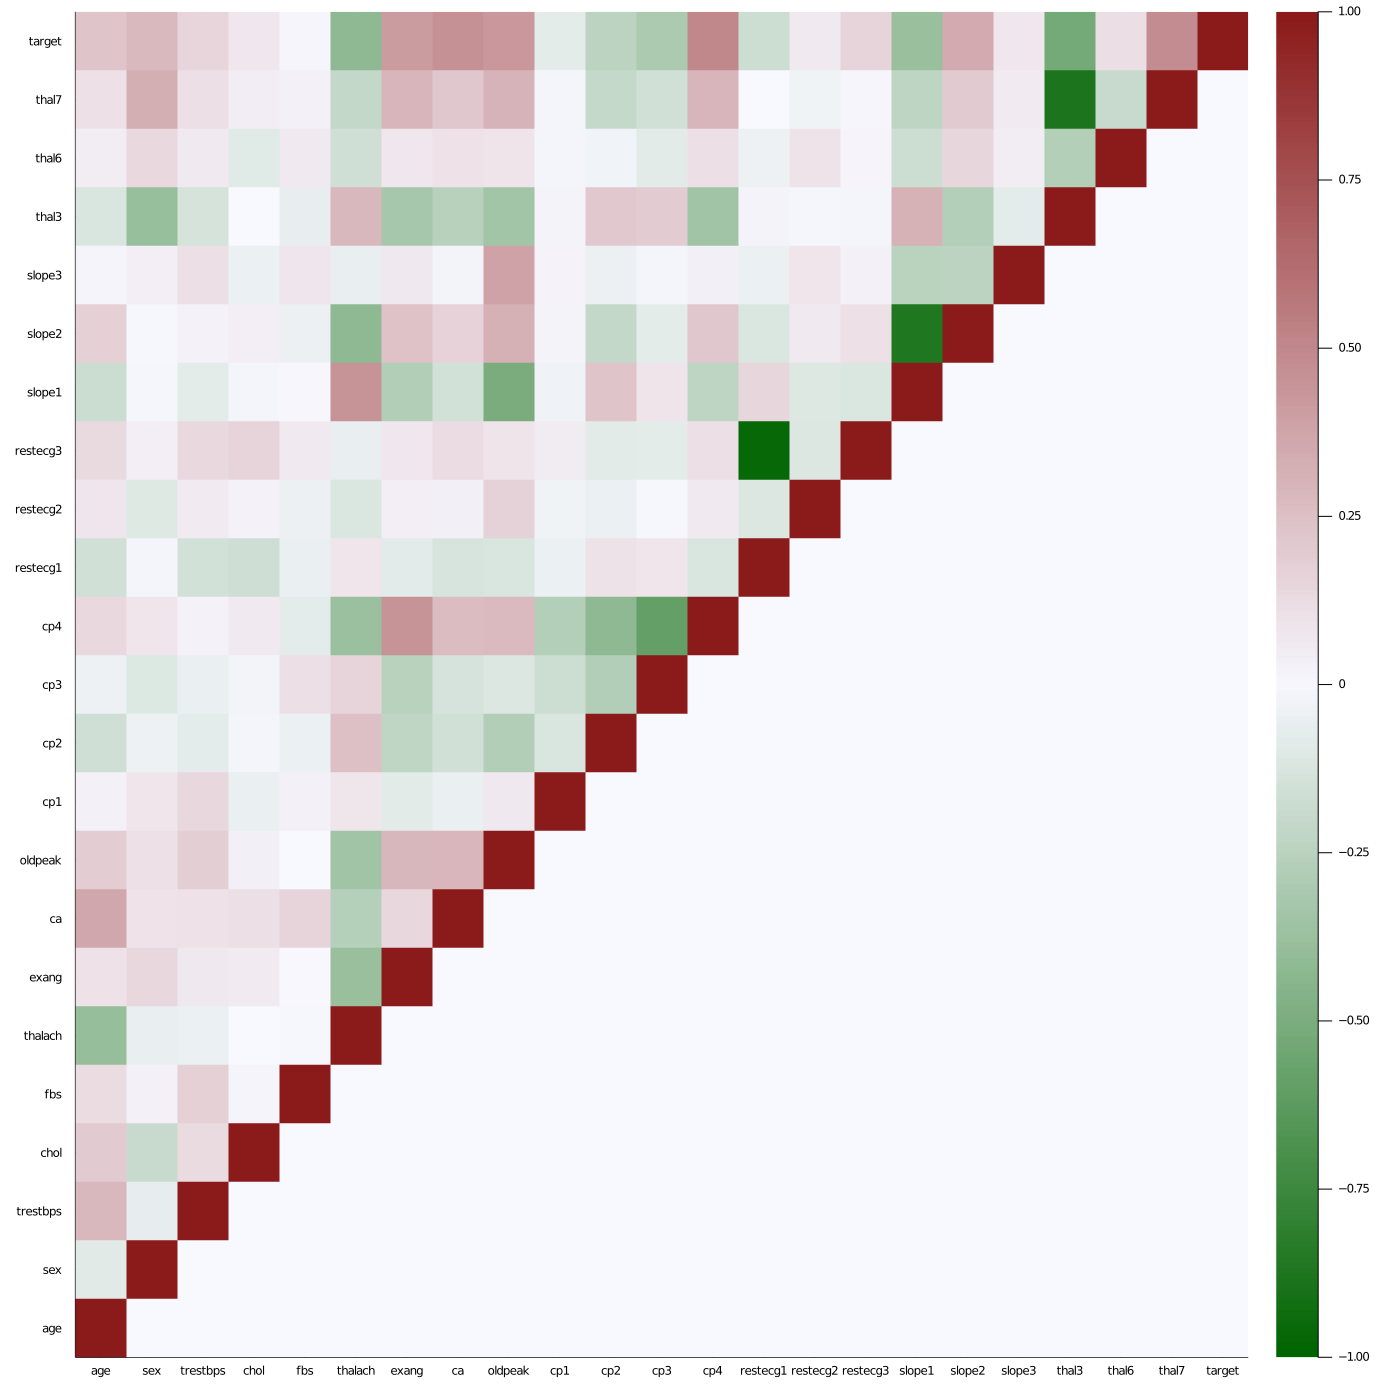

In [113]:
# Getting the correlation matrix
OneHot_CorrMatrix = GetCorrelationMatrix(OneHot_df); # Funtion defined in Correlation.jl

# Setting the names of each row and column
OneHot_summary = ["age","sex","trestbps","chol","fbs","thalach","exang","ca","oldpeak","cp1","cp2","cp3","cp4",
    "restecg1","restecg2","restecg3","slope1","slope2","slope3","thal3","thal6","thal7","target"]

# Plotting the heatmap for our correlation matrix
heatmap(OneHot_summary, OneHot_summary, OneHot_CorrMatrix, size =[1400, 1400], c = color, clims=(-1, 1), xticks=:all, yticks=:all)

Because it is a big picture it will also be saved in Graphs folder for better visualization.

In [114]:
png(heatmap(OneHot_summary, OneHot_summary, OneHot_CorrMatrix, size =[1400, 1400], c = color, clims=(-1, 1), xticks=:all, yticks=:all)
, "Graphs/OneHot_CorrelationMatrix") # Function defined in Plots Pkg

Now we can look for the strongest correlations of the matrix, and focus our eyes in the target.

In [115]:
# Finding the correlations greater than 0.4 and inferior than -0.4
best = findall(x -> (x >= 0.40 && x < 0.7) || (x <= -0.40 && x > -0.7), OneHot_CorrMatrix)

for cord in best
    println("$(OneHot_summary[cord[1]]) x $(OneHot_summary[cord[2]])")
end

slope1 x thalach
slope2 x thalach
target x thalach
cp4 x exang
target x exang
target x ca
slope1 x oldpeak
target x oldpeak
cp4 x cp2
cp4 x cp3
target x cp4
target x thal3
target x thal7


<br>

[Back to the top](#Sumary)

<hr>

## Saving Data

To finish, we just export our transformed data for futher use.

In [121]:
CSV.write("Data/AnalysisData/AnalysisData.data", df)
CSV.write("Data/AnalysisData/OneHot_AnalysisData.data", OneHot_df)

"Data/AnalysisData/OneHot_AnalysisData.data"

<br>

[Back to the top](#Sumary)